## Loan Application Status Prediction

**Evaluation Project - Phase 2**

**Submitted By: Bisola Beauty Ayankoya**

## Project Description

The Loan Application Status Prediction is a machine learning initiative designed to predict the suitability of loan applications for approval or rejection, drawing on a range of applicant-related features and data points. The objective is to support financial entities like banks or lending firms in streamlining and standardizing the loan approval process, enhancing its effectiveness and impartiality. The dataset employed in this endeavor comprises details pertaining to individuals who have submitted loan applications.

See Link:https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Loan%20Application%20Status/loan_prediction.csv

**Problem Statement** : Predict the suitability of loan applications for approval or rejection.

In [1]:
# Import all neccessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import boxcox
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve
import joblib

In [2]:
# Importing Dataset 
df_loan = pd.read_csv('https://github.com/dsrscientist/DSData/raw/master/loan_prediction.csv')
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Exploring the data
df_loan.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df_loan.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
605,LP002960,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,Urban,N
606,LP002961,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


## Exploratory Data Analysis

In [5]:
# Let's Display the first few rows of the dataset
df_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
#Checking the dataset dimension
df_loan.shape

(614, 13)

This dataset consists of 614 rows and 13 columns. One column is assigned as the target variable, while the other 12 columns act as independent variables.

**Further details about the Loan Application Status Prediction**:
    
**Objective**    
    
The objective of this project, which focuses on predicting loan application outcomes, is to create a machine learning model that can assess whether a loan application should be approved or denied, using a range of applicant-related data.

**Independent Variables**:

1. **Loan_ID**: Unique identifier for each loan application.
2. **Gender**: Applicant's gender (male or female).
3. **Married**: Marital status of the applicant (married or not married).
4. **Dependents**: Number of dependents on the applicant for survival.
5. **Education**: Applicant's level of education (graduate or not graduate).
6. **Self_Employed**: Employment status of the applicant (self-employed or not self-employed).
7. **Applicant Income**: Disposable income available for the applicant's use.
8. **Coapplicant Income**: Disposable income available for people participating in the loan application process alongside the main applicant.
9. **Loan Amount**: The amount of money the applicant owes at any given time.
10. **Loan Amount** Term: Duration in which the loan is availed to the applicant.
11. **Credit History**: Record of the applicant's ability to repay debts and demonstrated responsibility in repaying them.
12. **Property Area**: The total area within the boundaries of the property.

**Dependent Variable**:

**Loan_Status**: If the loan application is approved or not (binary outcome: Y or N).

**Approach**

The project aims to analyze the connections between various independent variables and the dependent variable, which is the Loan Status. This involves several stages including data cleaning, preprocessing, and exploratory data analysis to gain insights. Following this, machine learning algorithms such as Logistic Regression, Decision Tree,Random Forest Classifier and Gradien Boosting classifier Models are employed to predict loan approval status using a portion of the dataset. The effectiveness of the model is then evaluated using a separate test set, and various performance metrics such as accuracy, confusion matrix, and classification report are scrutinized. Additionally, hyperparameter tuning will be carried out to improve the model's performance further.

**Insights**

The knowledge extracted from these models could aid **financial services organisations** in automating the early stages of loan approval procedures, boosting effectiveness, and possibly reducing the chances of human prejudice in decision-making.

In [7]:
# Check column for train data
df_loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
# Checking the list of columns for dataset
df_loan.columns.tolist()

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [9]:
# checking the types of columns
df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are three(3) different types of data(object,int64 and float64) present in the dataset.

### Data Preprocessing

In [10]:
# Checking the column info
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


This are some of the attributes of the dataset,which includes indexing type,column type,non null values and memory usage.Also there are some missing values in the dataset and needs to be dealth with.

In [11]:
#checking the null values
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Above are the null/missing we have revealed.

In [12]:
# Total Number of missing values in the dataset
df_loan.isnull().sum().sum()

149

**Handling the Missing Values**

In [13]:
# Lets fill the missing values
df_loan['Gender'] = df_loan['Gender'].fillna(df_loan['Gender'].mode()[0])
df_loan['Married'] = df_loan['Married'].fillna(df_loan['Married'].mode()[0])
df_loan['Dependents'] = df_loan['Dependents'].fillna(df_loan['Dependents'].mode()[0])
df_loan['Self_Employed'] = df_loan['Self_Employed'].fillna(df_loan['Self_Employed'].mode()[0])
df_loan['LoanAmount'] = df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].mode()[0])
df_loan['Loan_Amount_Term'] = df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].mode()[0])
df_loan['Credit_History'] = df_loan['Credit_History'].fillna(df_loan['Credit_History'].mode()[0])

In [14]:
# Check again the null values
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

The null/Missing values have now been treated

In [15]:
# Lets Get a better overview of the dataset
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


As observed,there are no more null values present in this dataset.We will as well be dropping/removing the Loan_ID column because it will have little or no impact on our predictions.

In [16]:
# Dropping the Loan_ID column
df_loan.drop('Loan_ID',axis=1,inplace=True)

In [17]:
# Checking to confirm it has been dropped
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


Confirmed removed,hence There are no more missing values in the DataSet, all complete 614.

<AxesSubplot:>

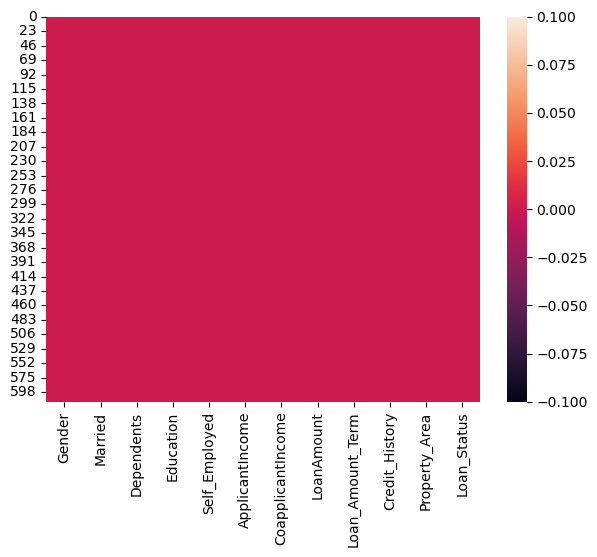

In [18]:
# Let's Visualize using the heatmap
plt.figure(figsize=(7,5))
sns.heatmap(df_loan.isnull())

As clearly seen,there are no missing data present in the dataset.

In [19]:
# Lets Describe the numerical columns of the dataframe 
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [20]:
# Separating the numerical from categorical columns

#check out the categorical columns
categorical_col = []
for i in df_loan.dtypes.index:
    if df_loan.dtypes[i] == "object":
        categorical_col.append(i)
print("categorical columns:", categorical_col)
print("\n")

#Check for Numerical column
numerical_col = []
for i in df_loan.dtypes.index:
    if df_loan.dtypes[i]!= "object":
        numerical_col.append(i)
print("numerical columns:", numerical_col)

categorical columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


numerical columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [21]:
# Checking the unique values of objects-column
for col in df_loan.select_dtypes(include='object').columns:
    print(col)
    print(df_loan[col].unique())

Gender
['Male' 'Female']
Married
['No' 'Yes']
Dependents
['0' '1' '2' '3+']
Education
['Graduate' 'Not Graduate']
Self_Employed
['No' 'Yes']
Property_Area
['Urban' 'Rural' 'Semiurban']
Loan_Status
['Y' 'N']


In [22]:
# Finding number of unique values in the column
df_loan.nunique().to_frame("No.of unique values")

,No.of unique values
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10
Credit_History,2


All the features have more than one single value.

In [23]:
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [24]:
# Checking the list of counts of target
df_loan["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

There are two categories present in the target column namely "Yes" and "No"

In [25]:
# Checking the unique values in target column
df_loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

It is assumed that "Yes" stands for **LOAN APPROVED**, while "No" for **LOAN REJECTED/NOT APPROVED**.

### Dataset Description

In [26]:
# Statistical summary of numerical columns
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


These are the statistical details of the numerical columns.The dataset summary looks good because there are no negative/invalid values present.

From the above we can analyse further-:

1.  The counts of all the columns are of same values, hence there are no missing values in the dataset.
2.  The mean value is greater than the median(50%) in the Applicant Income, Co-applicant Income and the Loan amount term  columns,hence the data is skewed to right in these columns.
3.  The data in the column "Loan Amount Term"  and "Credit History" have lower mean value to the median,which implied that this data are left skewed.
4.  By summarizing the data we can observe there is a huge differences between 75% and max, meaning there are outliers present       in the data.
5.  We can also notice the Standard deviation,min,25% percentile from this describe method.

In [27]:
# Lets also check the statistical distribution for numerical features
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.465798,84.180967,9.0,100.25,125.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


### Data Visualization

**Univariate analysis**

In [28]:
# Visualizing the loan status
print(df_loan['Loan_Status'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64


In [29]:
target_df=df_loan['Loan_Status'].value_counts()*100/df_loan.shape[0]
target_df

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [30]:
df_loan['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

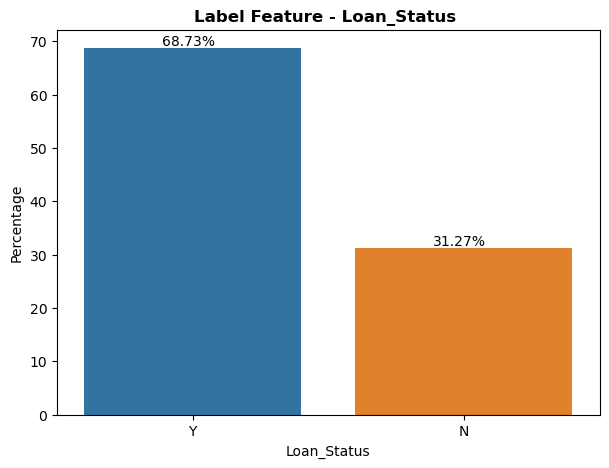

In [31]:
# Visualizing the count of Target variable
plt.figure(figsize=(7,5))
plt.title("Label Feature - Loan_Status ",fontdict={'fontweight':'bold','fontsize':12})
ax=sns.barplot(x=target_df.index,y=target_df.values)
plt.xlabel('Loan_Status')
plt.ylabel('Percentage')

for p in ax.patches:
    height=p.get_height()
    width=p.get_width()
    x,_=p.get_xy()
    ax.text(x+width/2.8,height+0.5,f'{height:.2f}%')

Our observation shows that the count of "Yes Loan Approved"  is higher than that of "No Loan not approved" i.e.the number of loans approved is higher according to the loan status report.This leads to CLASS IMBALANCE issue in the data and will have to be adjusted by using OVERSAMPLING METHOD later on in the project.

In [32]:
#Identify the categorical variables
categorical_variables=[feature for feature in df_loan.columns if ((df_loan[feature].dtypes=='O') & (feature not in ['loan']))]
categorical_variables

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

Male      502
Female    112
Name: Gender, dtype: int64


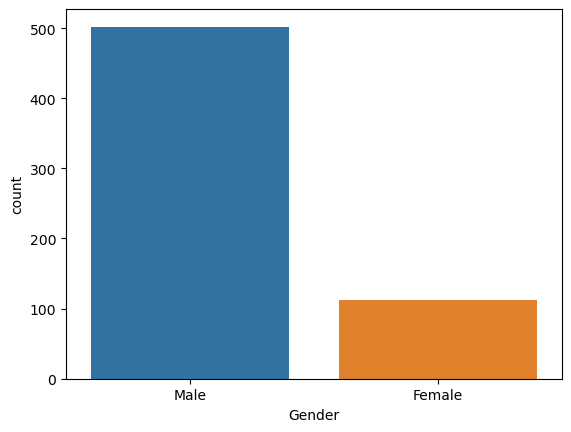

In [33]:
# Visualizing the count of Gender
print(df_loan['Gender'].value_counts())
ax = sns.countplot(x='Gender', data=df_loan)
plt.show()

Yes    401
No     213
Name: Married, dtype: int64


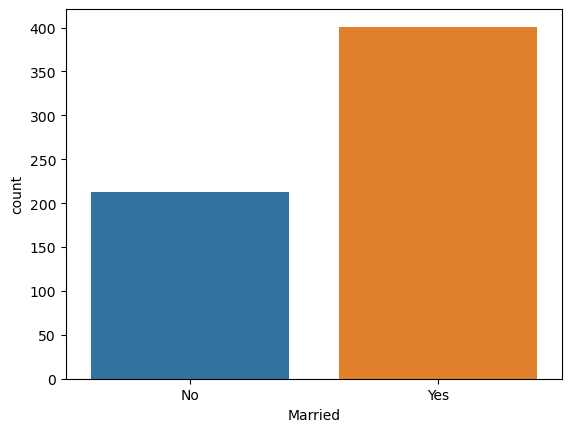

In [34]:
# Visualizing the count of Married
print(df_loan['Married'].value_counts())
ax = sns.countplot(x='Married', data=df_loan)
plt.show()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


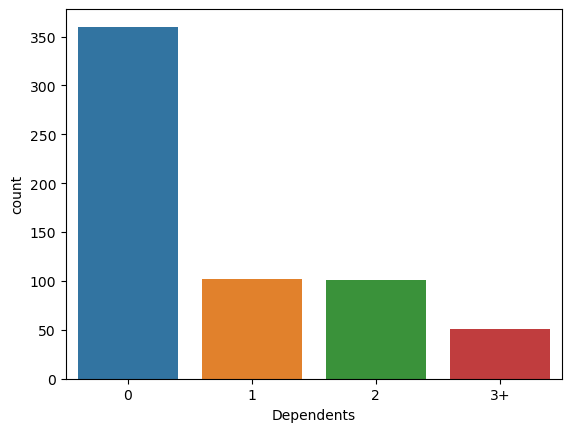

In [35]:
# Visualizing the count of Dependents
print(df_loan['Dependents'].value_counts())
ax = sns.countplot(x='Dependents', data=df_loan)
plt.show()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


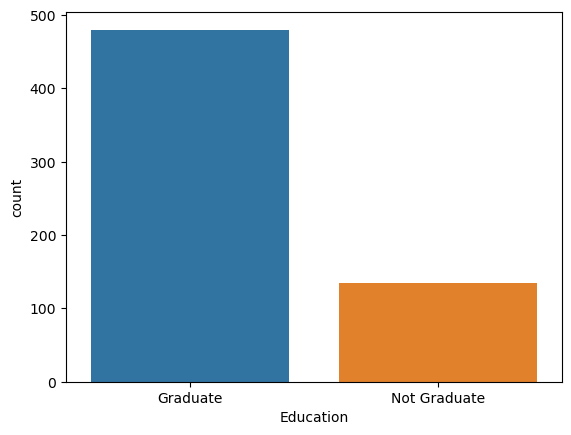

In [36]:
# Visualizing the count of Education
print(df_loan['Education'].value_counts())
ax = sns.countplot(x='Education', data=df_loan)
plt.show()

No     532
Yes     82
Name: Self_Employed, dtype: int64


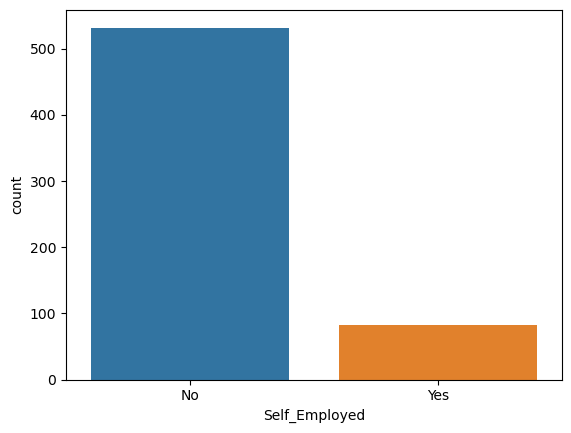

In [37]:
# Visualizing the count of Self_Employed
print(df_loan['Self_Employed'].value_counts())
ax = sns.countplot(x='Self_Employed', data=df_loan)
plt.show()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


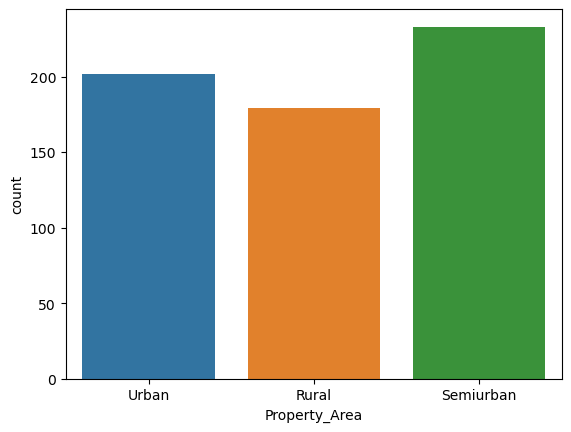

In [38]:
# Visualizing the count of Property_Area
print(df_loan['Property_Area'].value_counts())
ax = sns.countplot(x='Property_Area', data=df_loan)
plt.show()

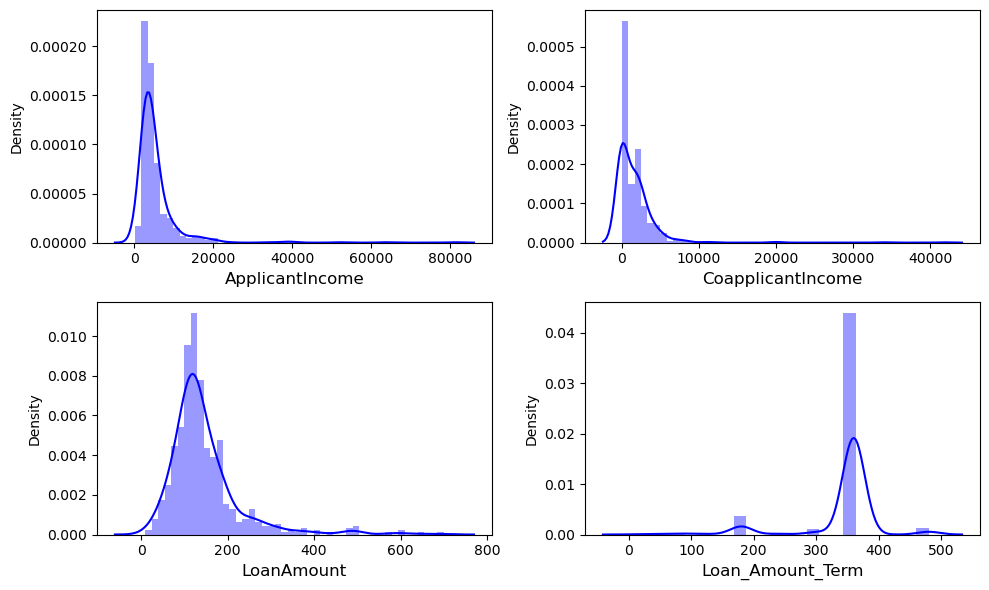

In [39]:
#Lets check how the data has been distributed in remaining column.(Using the loop)
plt.figure(figsize = (10, 6), facecolor ="white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.distplot(df_loan[col], color = "b")
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots we can notice that all the data had skewness in them. The data in the column ApplicantIncome and CoapplicantIncome are skewed to the right,While the columns LoanAmountTerm is skewed to the left.The Column Loan amount is a bit skewed to the right as well.

**Bivariate Analysis**

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


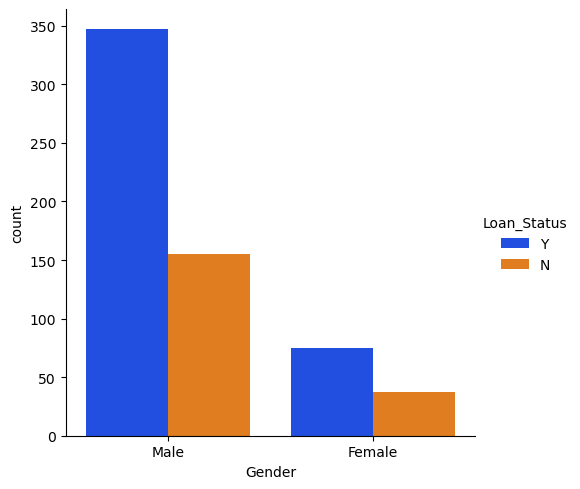

In [40]:
# Comparing Gender and Loan Status
print(pd.crosstab(df_loan['Gender'],df_loan['Loan_Status']))
sns.catplot(x = 'Gender', hue = 'Loan_Status', palette = "bright", kind = "count", data = df_loan)
plt.show()

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288


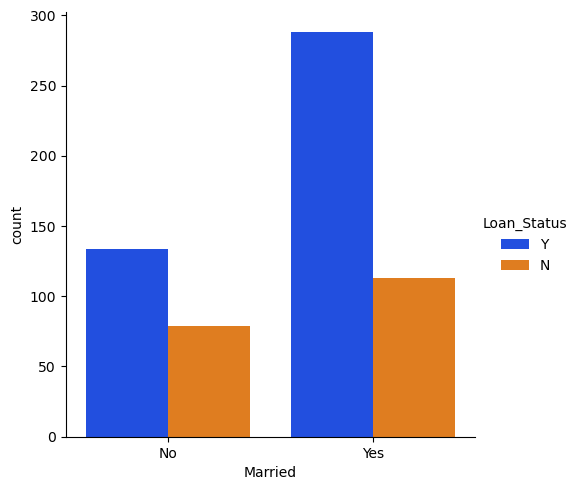

In [41]:
# Comparing Married and Loan Status
print(pd.crosstab(df_loan['Married'],df_loan['Loan_Status']))
sns.catplot(x = 'Married', hue = 'Loan_Status', palette = "bright", kind = "count", data = df_loan)
plt.show()

Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33


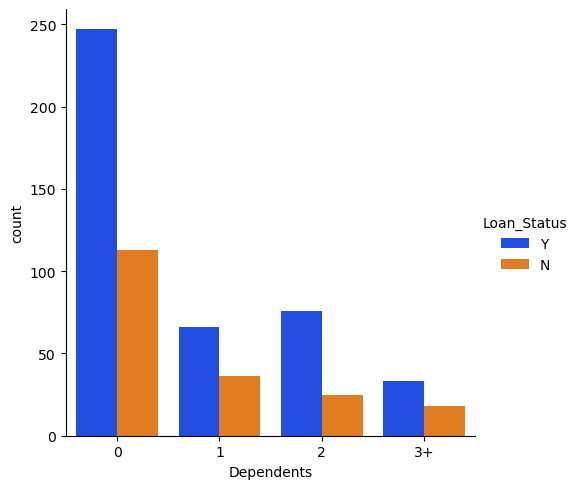

In [42]:
# Comparing Dependents and Loan Status
print(pd.crosstab(df_loan['Dependents'],df_loan['Loan_Status']))
sns.catplot(x = 'Dependents', hue = 'Loan_Status', palette = "bright", kind = "count", data = df_loan)
plt.show()

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


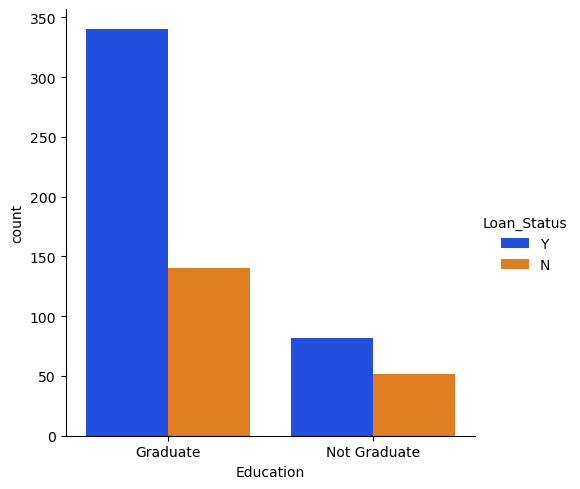

In [43]:
# Comparing Education and Loan Status
print(pd.crosstab(df_loan['Education'],df_loan['Loan_Status']))
sns.catplot(x = 'Education', hue = 'Loan_Status', palette = "bright", kind = "count", data = df_loan)
plt.show()

Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


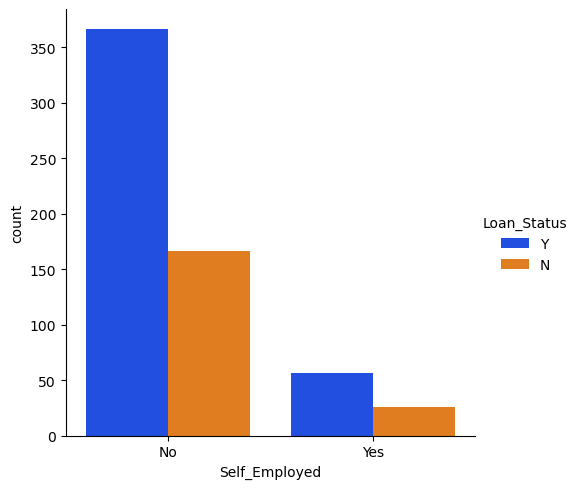

In [44]:
# Comparing Self_Employed and Loan Status
print(pd.crosstab(df_loan['Self_Employed'],df_loan['Loan_Status']))
sns.catplot(x = 'Self_Employed', hue = 'Loan_Status', palette = "bright", kind = "count", data = df_loan)
plt.show()

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


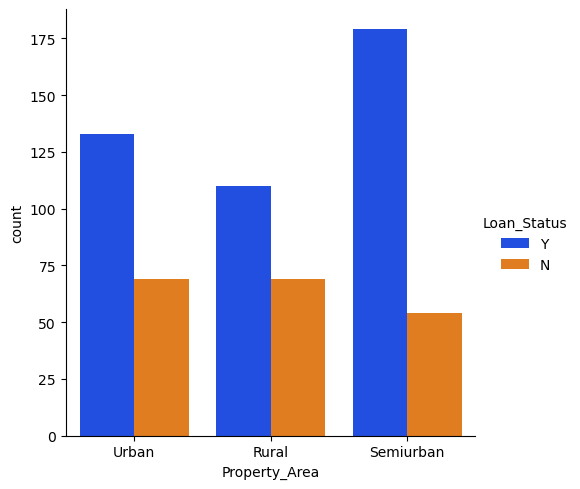

In [45]:
# Comparing Property_Area and Loan Status
print(pd.crosstab(df_loan['Property_Area'],df_loan['Loan_Status']))
sns.catplot(x = 'Property_Area', hue = 'Loan_Status', palette = "bright", kind = "count", data = df_loan)
plt.show()

Text(0.5, 0, 'Credit_History')

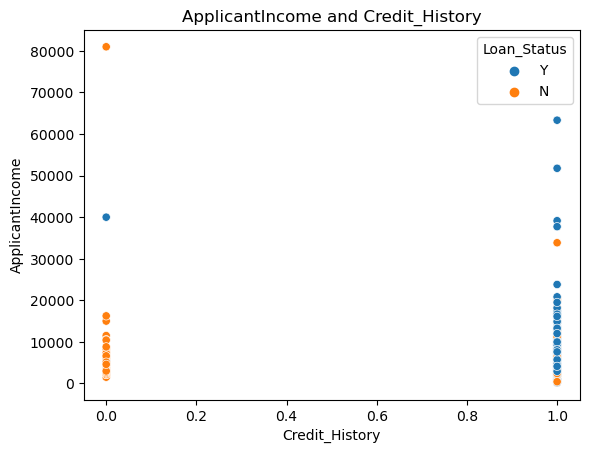

In [46]:
# Comparing  ApplicantIncome and Credit_History on the basis of Loan_Status
sns.scatterplot('Credit_History','ApplicantIncome',hue='Loan_Status',data=df_loan)
plt.title('ApplicantIncome and Credit_History')
plt.xlabel('Credit_History',fontsize=10)

Text(0.5, 0, 'Credit_History')

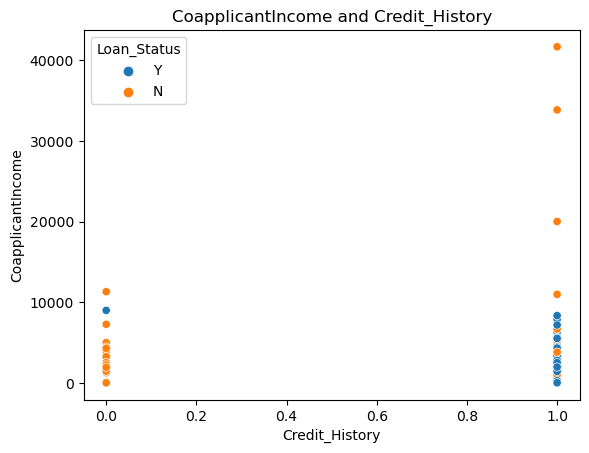

In [47]:
# Comparing  CoapplicantIncome and Credit_History on the basis of Loan_Status
sns.scatterplot('Credit_History','CoapplicantIncome',hue='Loan_Status',data=df_loan)
plt.title('CoapplicantIncome and Credit_History')
plt.xlabel('Credit_History',fontsize=10)

Text(0.5, 0, 'Credit_History')

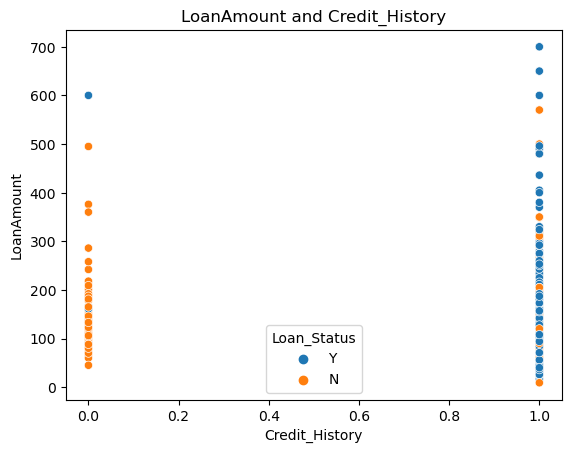

In [48]:
# Comparing  LoanAmount and Credit_History on the basis of Loan_Status
sns.scatterplot('Credit_History','LoanAmount',hue='Loan_Status',data=df_loan)
plt.title('LoanAmount and Credit_History')
plt.xlabel('Credit_History',fontsize=10)

Text(0.5, 0, 'Credit_History')

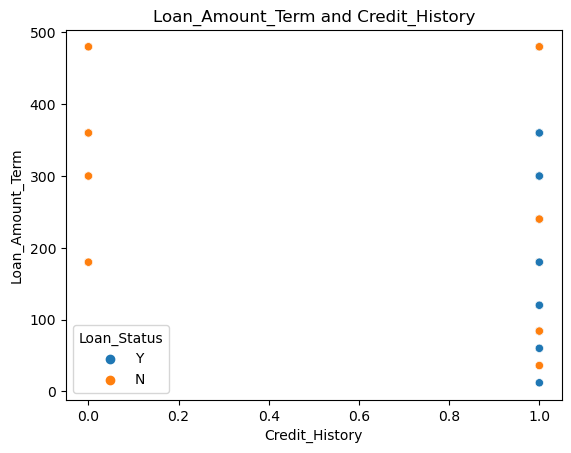

In [49]:
# Comparing  Loan_Amount_Term and Credit_History on the basis of Loan_Status
sns.scatterplot('Credit_History','Loan_Amount_Term',hue='Loan_Status',data=df_loan)
plt.title('Loan_Amount_Term and Credit_History')
plt.xlabel('Credit_History',fontsize=10)

Text(0.5, 0, 'ApplicantIncome')

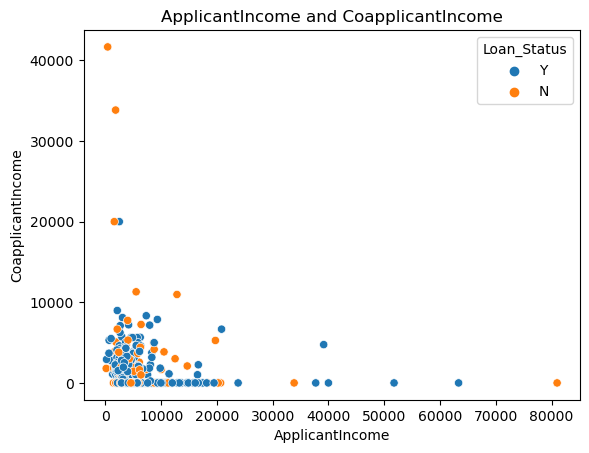

In [50]:
# Comparing  ApplicantIncome and CoapplicantIncome on the basis of Loan_Status
sns.scatterplot('ApplicantIncome','CoapplicantIncome',hue='Loan_Status',data=df_loan)
plt.title('ApplicantIncome and CoapplicantIncome')
plt.xlabel('ApplicantIncome',fontsize=10)

Text(0.5, 0, 'ApplicantIncome')

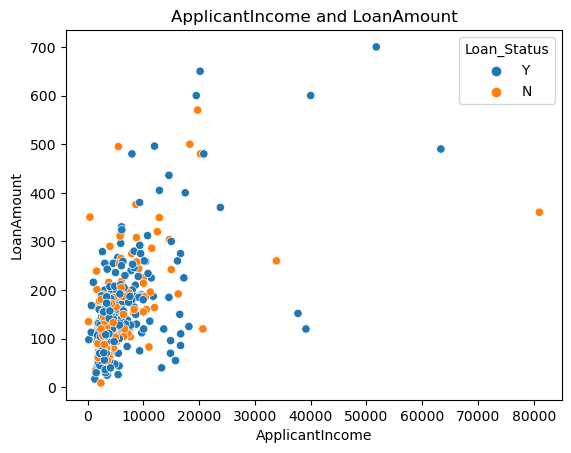

In [51]:
# Comparing  ApplicantIncome and LoanAmount on the basis of Loan_Status
sns.scatterplot('ApplicantIncome','LoanAmount',hue='Loan_Status',data=df_loan)
plt.title('ApplicantIncome and LoanAmount')
plt.xlabel('ApplicantIncome',fontsize=10)

Text(0.5, 0, 'ApplicantIncome')

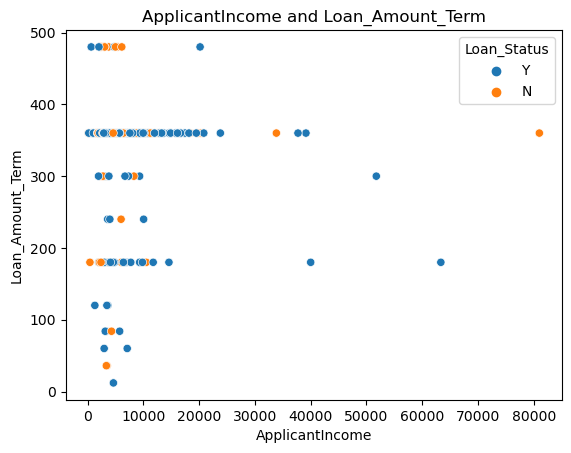

In [52]:
# Comparing  ApplicantIncome and Loan_Amount_Term on the basis of Loan_Status
sns.scatterplot('ApplicantIncome','Loan_Amount_Term',hue='Loan_Status',data=df_loan)
plt.title('ApplicantIncome and Loan_Amount_Term')
plt.xlabel('ApplicantIncome',fontsize=10)

Text(0.5, 0, 'CoapplicantIncome')

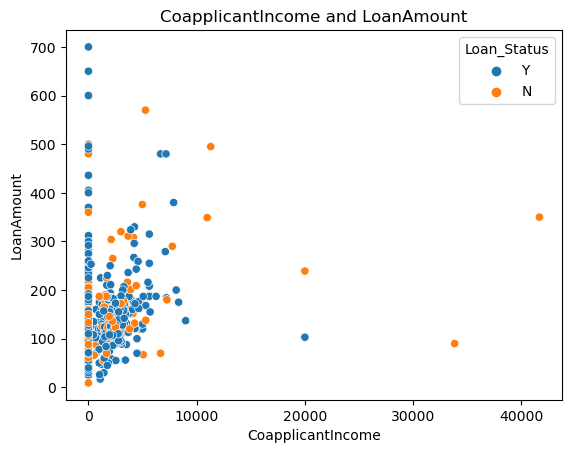

In [53]:
# Comparing  CoapplicantIncome and LoanAmount on the basis of Loan_Status
sns.scatterplot('CoapplicantIncome','LoanAmount',hue='Loan_Status',data=df_loan)
plt.title('CoapplicantIncome and LoanAmount')
plt.xlabel('CoapplicantIncome',fontsize=10)

Text(0.5, 0, 'CoapplicantIncome')

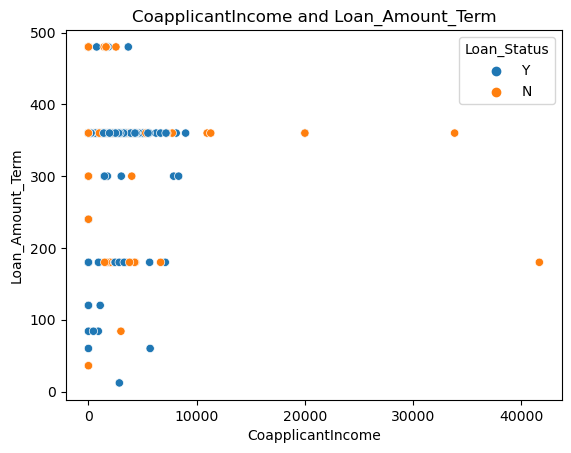

In [54]:
# Comparing  CoapplicantIncome and Loan_Amount_Term on the basis of Loan_Status
sns.scatterplot('CoapplicantIncome','Loan_Amount_Term',hue='Loan_Status',data=df_loan)
plt.title('CoapplicantIncome and Loan_Amount_Term')
plt.xlabel('CoapplicantIncome',fontsize=10)

Text(0.5, 0, 'Gender')

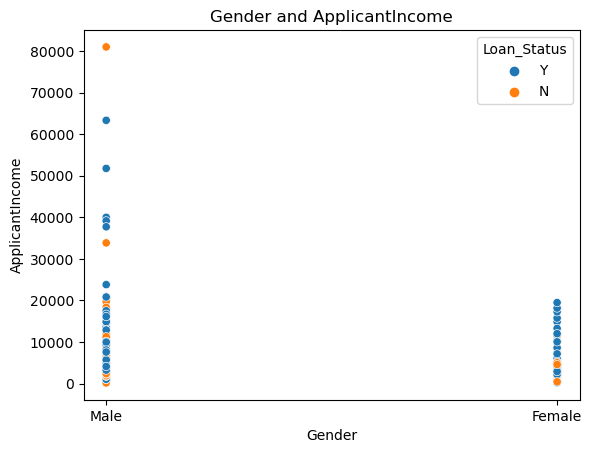

In [55]:
# Comparing  Gender and ApplicantIncome on the basis of Loan_Status
sns.scatterplot('Gender','ApplicantIncome',hue='Loan_Status',data=df_loan)
plt.title('Gender and ApplicantIncome')
plt.xlabel('Gender',fontsize=10)

Text(0.5, 0, 'Gender')

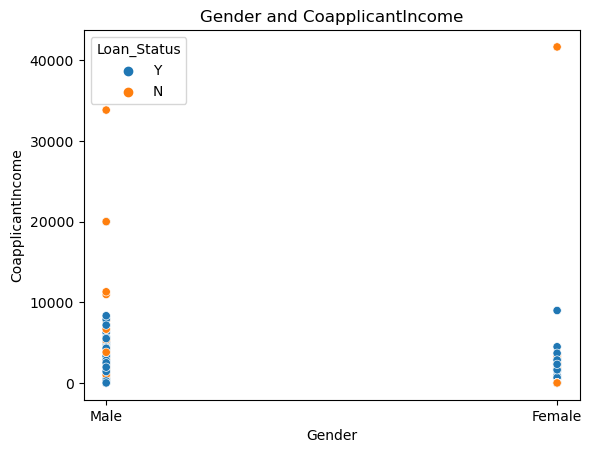

In [56]:
# Comparing  Gender and CoapplicantIncome on the basis of Loan_Status
sns.scatterplot('Gender','CoapplicantIncome',hue='Loan_Status',data=df_loan)
plt.title('Gender and CoapplicantIncome')
plt.xlabel('Gender',fontsize=10)

Text(0.5, 0, 'Gender')

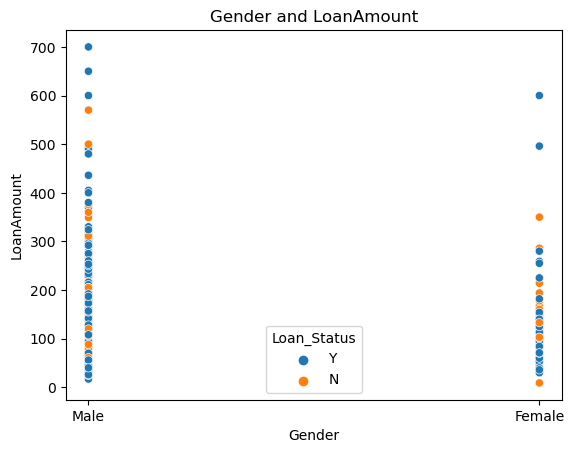

In [57]:
# Comparing  Gender and LoanAmount on the basis of Loan_Status
sns.scatterplot('Gender','LoanAmount',hue='Loan_Status',data=df_loan)
plt.title('Gender and LoanAmount')
plt.xlabel('Gender',fontsize=10)

Text(0.5, 0, 'Gender')

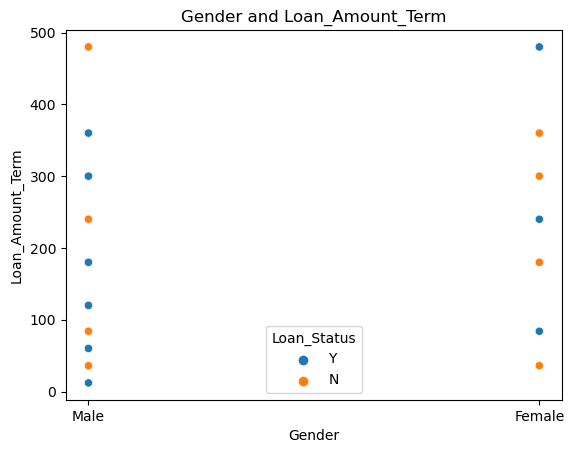

In [58]:
# Comparing  Gender and Loan_Amount_Term on the basis of Loan_Status
sns.scatterplot('Gender','Loan_Amount_Term',hue='Loan_Status',data=df_loan)
plt.title('Gender and Loan_Amount_Term')
plt.xlabel('Gender',fontsize=10)

Text(0.5, 0, 'Gender')

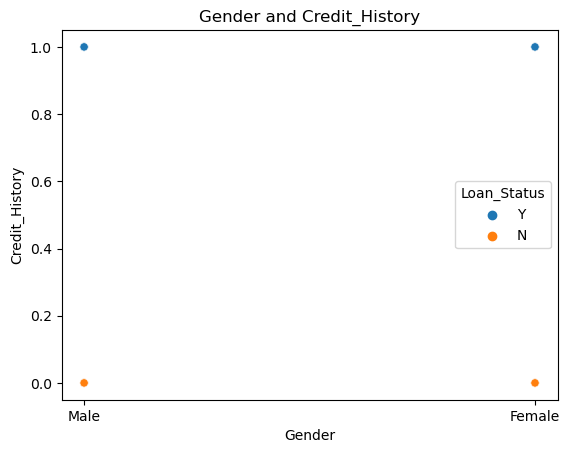

In [59]:
# Comparing  Gender and Credit_History on the basis of Loan_Status
sns.scatterplot('Gender','Credit_History',hue='Loan_Status',data=df_loan)
plt.title('Gender and Credit_History')
plt.xlabel('Gender',fontsize=10)

Text(0.5, 0, 'Loan_Amount_Term')

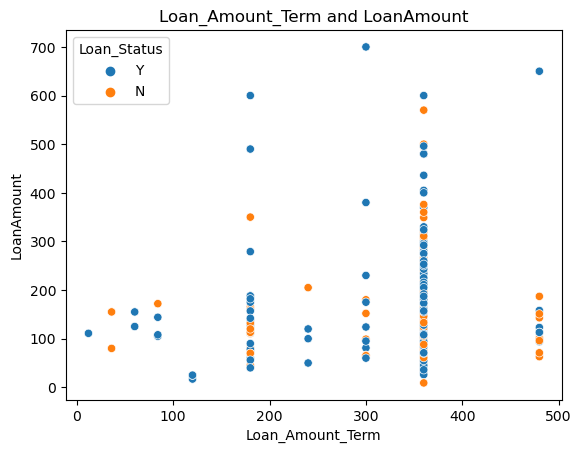

In [60]:
# Comparing Loan_Amount_Term and LoanAmount on the basis of Loan_Status
sns.scatterplot('Loan_Amount_Term','LoanAmount',hue='Loan_Status',data=df_loan)
plt.title('Loan_Amount_Term and LoanAmount')
plt.xlabel('Loan_Amount_Term',fontsize=10)

**Multivariate Analysis**

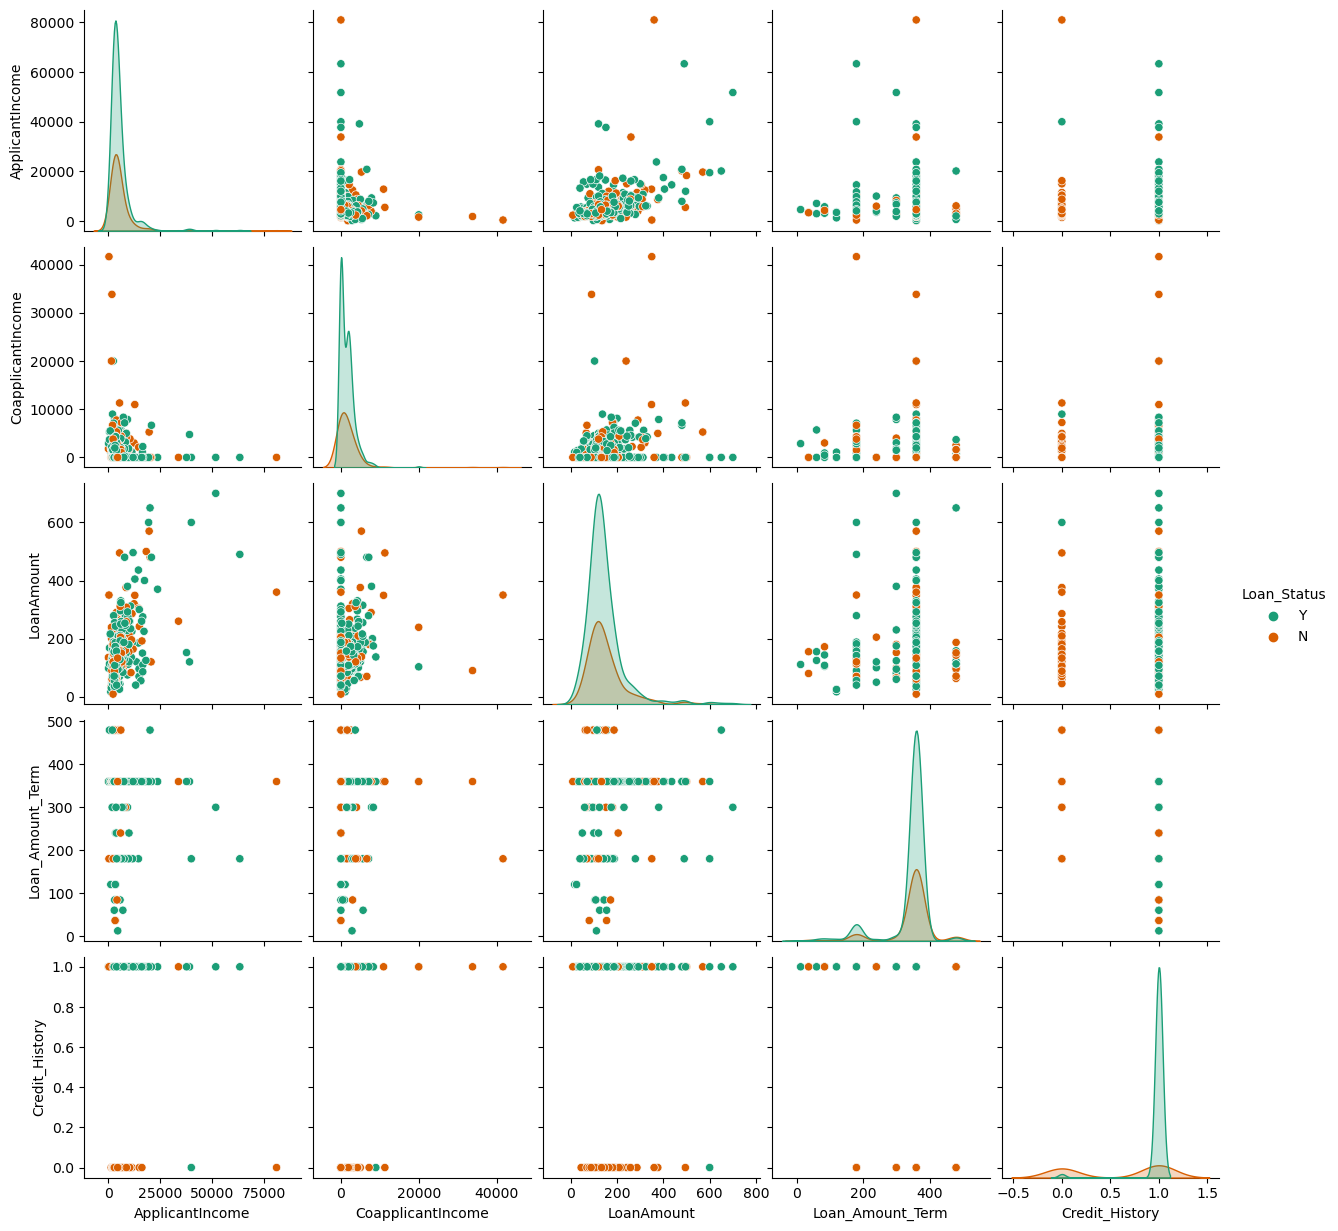

In [61]:
sns.pairplot(df_loan, hue = "Loan_Status", palette = "Dark2")
plt.show()

**Checking for and removing Outliers**

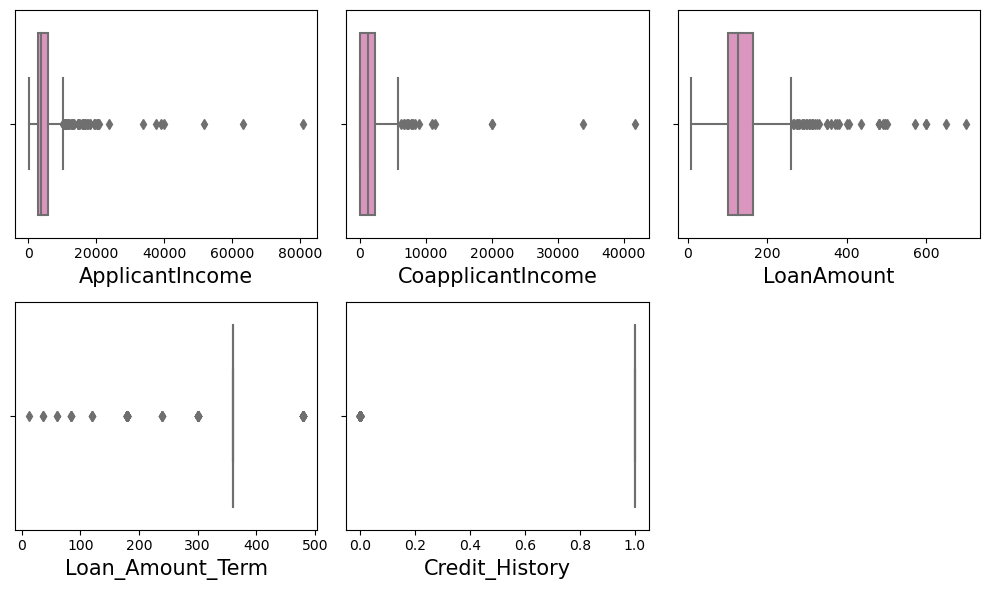

In [62]:
# Checking the Outliers by plotting boxplot.
plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=5:
        ax = plt.subplot(2, 3, plotnumber)
        sns.boxplot(df_loan[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

All the Columns has Outliers in them.

**Checking the zscore**

In [63]:
z=np.abs(zscore(df_loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]))
print(np.where(z>4))

(array([ 68, 130, 155, 155, 171, 171, 177, 183, 185, 242, 262, 313, 333,
       333, 369, 402, 409, 417, 443, 487, 495, 497, 546, 561, 575, 581,
       585, 600, 604], dtype=int64), array([3, 2, 0, 2, 0, 2, 2, 0, 0, 3, 3, 3, 0, 2, 2, 1, 0, 1, 0, 2, 3, 3,
       3, 2, 3, 1, 3, 1, 2], dtype=int64))


In [64]:
z=np.abs(zscore(df_loan[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]))
threshold = 4
df1 = df_loan[(z<4).all(axis = 1)]

In [65]:
print ("Shape of the dataframe before removing outliers: ", df_loan.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df_loan.shape[0]-df1.shape[0])/df_loan.shape[0]*100)

Shape of the dataframe before removing outliers:  (614, 12)
Shape of the dataframe after removing outliers:  (588, 12)
Percentage of data loss post outlier removal:  4.234527687296417


In [66]:
df_loan.shape

(614, 12)

**Checking for Skewness**

In [67]:
df_loan.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

The Columns ApplicantIncome and CoapplicantIncome have a high level of skewness in the data.

**Removing Skewness**

In [68]:
# Removing skewness using cuberoot method
df_loan['ApplicantIncome'] = np .cbrt(df_loan['ApplicantIncome'])
df_loan['CoapplicantIncome'] = np .cbrt(df_loan['CoapplicantIncome'])

**We have removed the skewness using cube root method**

In [69]:
# Let's Check the skewness again
df_loan.skew()

ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

The skewness has been reduced for the two columns.

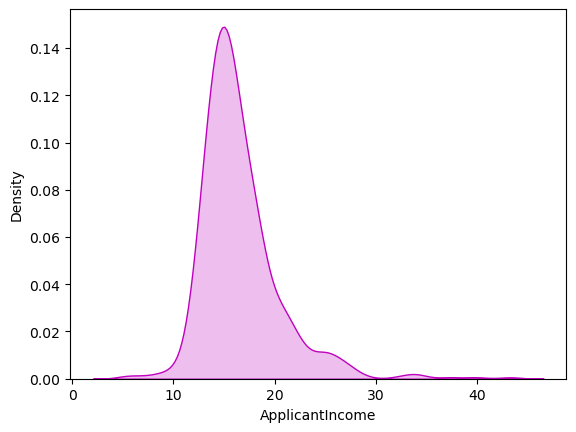

In [70]:
# Lets visualize how the data has been distributed in ApplicantIncome after removing skewness
sns.distplot(df_loan['ApplicantIncome'], color = "m", kde_kws = {"shade":True}, hist = False)
plt.show()

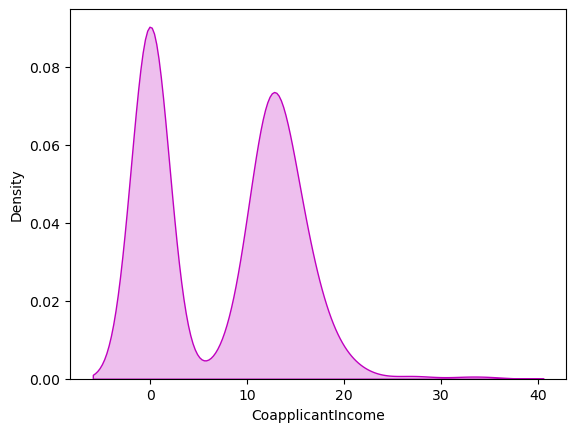

In [71]:
# data distribution in CoapplicantIncome after skewness
sns.distplot(df_loan['CoapplicantIncome'],color = "m", kde_kws = {"shade":True}, hist = False)
plt.show()

This looks a bit normal as the skweness is removed.

**Encoding Categorical Columns**

In [72]:
# Encoding Categorical Columns using OrdinalEncoder
OE = OrdinalEncoder()
for i in df_loan.columns:
    if df_loan[i].dtypes == 'object':
        df_loan[i] = OE.fit_transform(df_loan[i].values.reshape(-1,1))
df_loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,18.017473,0.000000,120.0,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,16.610522,11.467457,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,14.422496,0.000000,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,13.720654,13.310098,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,18.171206,0.000000,141.0,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,14.260431,0.000000,71.0,360.0,1.0,0.0,1.0
610,1.0,1.0,3.0,0.0,0.0,16.013010,0.000000,40.0,180.0,1.0,0.0,1.0
611,1.0,1.0,1.0,0.0,0.0,20.059821,6.214465,253.0,360.0,1.0,2.0,1.0
612,1.0,1.0,2.0,0.0,0.0,19.646281,0.000000,187.0,360.0,1.0,2.0,1.0


In [73]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    float64
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    float64
 11  Loan_Status        614 non-null    float64
dtypes: float64(12)
memory usage: 57.7 KB


We have now converted the categorical columns into numerical columns using Ordinal Encoding(OE) method.

In [74]:
# Here is the Statistical Summary of numerical
df_loan.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,16.520506,7.480926,145.465798,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,3.939230,7.108669,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,5.313293,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,14.223454,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,15.621999,10.592145,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,17.961849,13.194779,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,43.267487,34.668156,700.000000,480.000000,1.000000,2.000000,1.000000


All column details are shown here After encoding the categorical columns.The counts of all the columns are same that means no null values in the dataset.
The describe method describe the count,mean,std,min,IQR and max values of all the columns.

**Correlation between Target variable and Independent Variables**

In [75]:
# Checking the correlation between features and the target.
cor = df_loan.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.075111,0.208217,0.106404,-0.074030,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.034547,0.280112,0.146212,-0.100912,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.122477,-0.004252,0.163017,-0.103864,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.181428,0.010615,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.188492,-0.074737,0.114971,-0.033739,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.075111,0.034547,0.122477,-0.181428,0.188492,1.000000,-0.325066,0.598856,-0.035847,0.009937,-0.024827,0.004341
CoapplicantIncome,0.208217,0.280112,-0.004252,0.010615,-0.074737,-0.325066,1.000000,0.106305,-0.002645,0.005038,-0.052318,0.033582
LoanAmount,0.106404,0.146212,0.163017,-0.169436,0.114971,0.598856,0.106305,1.000000,0.037152,-0.000250,-0.047414,-0.031808
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.035847,-0.002645,0.037152,1.000000,-0.004705,-0.076120,-0.022549
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,0.009937,0.005038,-0.000250,-0.004705,1.000000,0.001963,0.540556


This gives the correlation between the dependent and independent variables.We will visualize this by plotting heatmap.

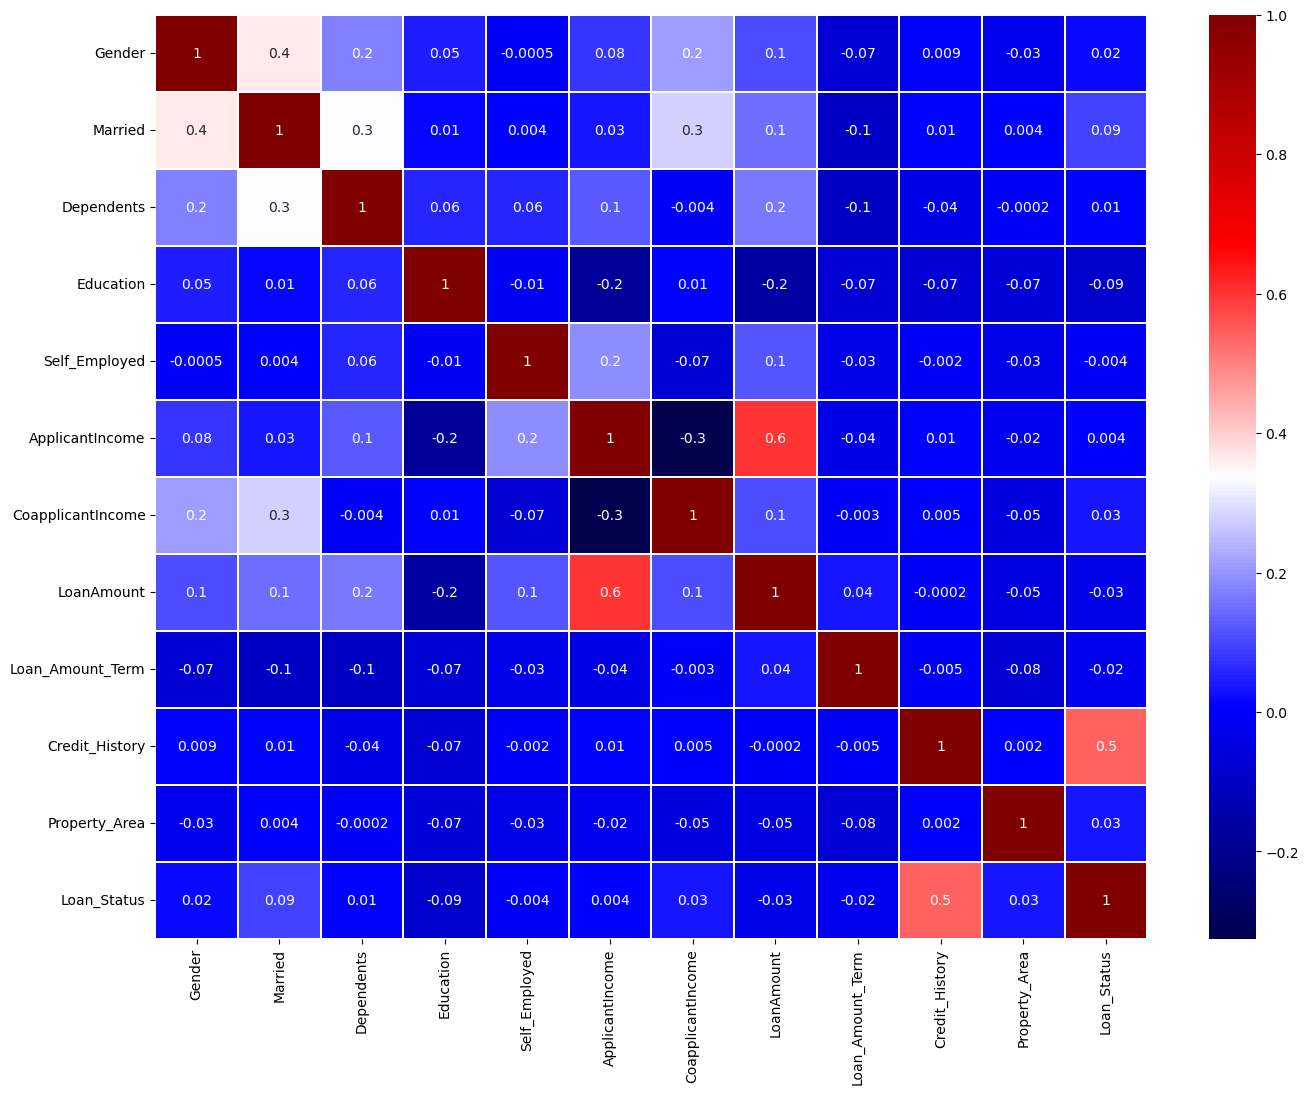

In [76]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (16, 12))
sns.heatmap(df_loan.corr(), linewidths = 0.1, fmt = ".1g", linecolor = "white", annot = True, cmap = "seismic")
plt.yticks(rotation = 0);
plt.show()

In [77]:
# 0- no relation, -0.3 to +0.3- less correlation, greater than -0.5 or greater than +0.5- moderate correlation, greater than -0.7

The above heatmap shows the correlation matrix by visualizing the data.We can observe the relationship between feature to feature and feature to label.This heatmap contains both positive and negative correlation.

1. There are some positive correlation between the target and features.
2. The column Gender,Married,Dependents,ApplicantIncome,CoapplicantIncome,Credit History and Property Area have positive correlation with the Label Column "Loan Status".
3. The label is negatively correlated with Education,Self Employed, Loan Amount and the Loan Amount Term.
4. The column Credit History have high correlation with the target.
5. The columns Gender and Married, Coapplicant and Married, Dependent and Married have high correlation with each other.


In [78]:
cor['Loan_Status'].sort_values(ascending = False)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
CoapplicantIncome    0.033582
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
ApplicantIncome      0.004341
Self_Employed       -0.003700
Loan_Amount_Term    -0.022549
LoanAmount          -0.031808
Education           -0.085884
Name: Loan_Status, dtype: float64

We can observe the positive and negative correlated features with the target.

**Visualizing the correlation between label and features using bar plot**

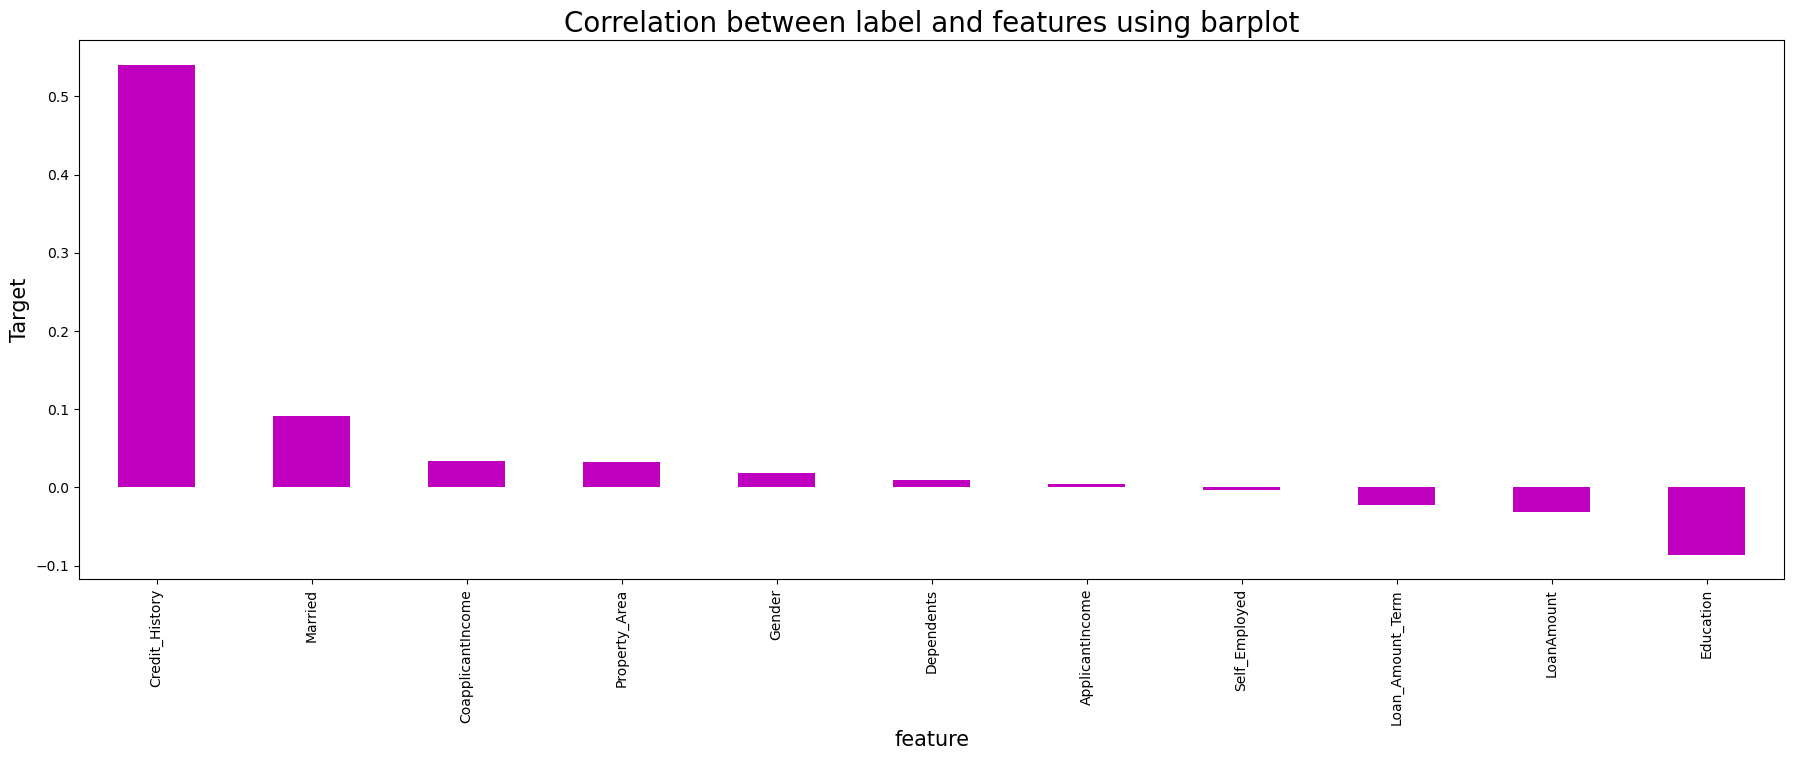

In [79]:
plt.figure(figsize = (22, 7))
df_loan.corr()['Loan_Status'].sort_values(ascending = False).drop(['Loan_Status']).plot(kind='bar',color="m")
plt.xlabel('feature', fontsize = 15)
plt.ylabel('Target', fontsize = 15)
plt.title("Correlation between label and features using barplot", fontsize=20)
plt.show()

As shown in the above bar plot,we can notice the positive and negative correlation between the features and the target.Here the features ApplicantIncome and Self Employed have very less correlation with the column.

**Separating Features and label**

In [80]:
x = df_loan.drop("Loan_Status", axis =1)
y = df_loan["Loan_Status"]

**Feature Scaling using standard scalarization**

In [81]:
Scaler = StandardScaler()
x = pd.DataFrame(Scaler.fit_transform(x), columns = x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.380325,-1.053225,-0.302759,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.022870,0.561256,-0.207648,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.533028,-1.053225,-0.944757,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.711341,0.820678,-0.302759,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.419383,-1.053225,-0.053093,0.273231,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.574203,-1.053225,-0.885313,0.273231,0.411733,-1.318513
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.128936,-1.053225,-1.253868,-2.522836,0.411733,-1.318513
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.899211,-0.178302,1.278459,0.273231,0.411733,1.223298
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.794146,-1.053225,0.493794,0.273231,0.411733,1.223298


We have scaled the data using Standard Scalarization method to overcome the issue of biaseness.

**Checking Variance Inflation Factor(VIF)**

In [82]:
# Finding variance inflation factor in each scaled column i.e.x.shape[1] (1/(1-R2))
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i)
              for i in range(len(x.columns))]
vif["features"] = x.columns

vif

,VIF values,features
0,1.199059,Gender
1,1.359037,Married
2,1.180670,Dependents
3,1.070662,Education
4,1.040726,Self_Employed
5,2.160140,ApplicantIncome
6,1.495616,CoapplicantIncome
7,1.902581,LoanAmount
8,1.040052,Loan_Amount_Term
9,1.007853,Credit_History


By checking VIF values we can find features causing multicollinearity problem(If any).However, non of the features are giving multicollinearity problems because they all have VIF values less than 10 which means they have low correlation with other features.Hence no need to drop any of them.

### Balancing the Dataset

In [83]:
y.value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

Here we can see that the data is not balanced,since it is a classification problem we will balance the data using oversampling method called SMOTE

**Oversampling**

In [84]:
# Oversampling the data 
SM = SMOTE()
x1,y1 = SM.fit_resample(x, y)

In [85]:
# checking the value count of target column
y.value_counts()

1.0    422
0.0    192
Name: Loan_Status, dtype: int64

In [86]:
y1.value_counts()

1.0    422
0.0    422
Name: Loan_Status, dtype: int64

Now that the data is balanced,we can build **Machine Learning** classification models.

### Machine Learning Models

**Finding the best random state**

In [87]:
maxAccu = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    RFC = RandomForestClassifier()
    RFC.fit(x_train, y_train)
    pred = RFC.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print("Best accuracy is", maxAccu, "at random_state", maxRs)

Best accuracy is 0.8779527559055118 at random_state 45


**SPLIT INTO TRAIN AND TEST (70:30)**

**Logistic Regression**

In [88]:
# Checking accuracy for Logistic Regression Model
LOGR = LogisticRegression()
LOGR.fit(x_train, y_train)
predLOGR = LOGR.predict(x_test)
print(accuracy_score(y_test, predLOGR))
print(confusion_matrix(y_test, predLOGR))
print(classification_report(y_test, predLOGR))

0.6535433070866141
[[ 49  73]
 [ 15 117]]
              precision    recall  f1-score   support

         0.0       0.77      0.40      0.53       122
         1.0       0.62      0.89      0.73       132

    accuracy                           0.65       254
   macro avg       0.69      0.64      0.63       254
weighted avg       0.69      0.65      0.63       254



**Decision Tree Classifier**

In [89]:
# Checking accuracy for Decision Tree-Classifier
DTree = DecisionTreeClassifier()
DTree.fit(x_train, y_train)
predDTree = DTree.predict(x_test)
print(accuracy_score(y_test, predDTree))
print(confusion_matrix(y_test, predDTree))
print(classification_report(y_test, predDTree))

0.7007874015748031
[[82 40]
 [36 96]]
              precision    recall  f1-score   support

         0.0       0.69      0.67      0.68       122
         1.0       0.71      0.73      0.72       132

    accuracy                           0.70       254
   macro avg       0.70      0.70      0.70       254
weighted avg       0.70      0.70      0.70       254



**Random Forest Classifier (Ensemble Method)**

In [90]:
# Checking accuracy for RF-Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.7795275590551181
[[ 81  41]
 [ 15 117]]
              precision    recall  f1-score   support

         0.0       0.84      0.66      0.74       122
         1.0       0.74      0.89      0.81       132

    accuracy                           0.78       254
   macro avg       0.79      0.78      0.78       254
weighted avg       0.79      0.78      0.78       254



**Gradient Boosting Classifier (Ensemble Method)**

In [91]:
# accuracy for Gradient Boosting Classifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train, y_train)
predGBC = GBC.predict(x_test)
print(accuracy_score(y_test, predGBC))
print(confusion_matrix(y_test, predGBC))
print(classification_report(y_test, predGBC))

0.7795275590551181
[[ 80  42]
 [ 14 118]]
              precision    recall  f1-score   support

         0.0       0.85      0.66      0.74       122
         1.0       0.74      0.89      0.81       132

    accuracy                           0.78       254
   macro avg       0.79      0.77      0.77       254
weighted avg       0.79      0.78      0.78       254



**Cross Validation Score**

In [92]:
# checking cv score for Logistic Regression
score = cross_val_score(LOGR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predLOGR)- score.mean())

[0.81300813 0.77235772 0.7804878  0.85365854 0.81147541]
0.8061975209916034
Difference between Accuracy score and cross validation score is - -0.15265421390498923


In [93]:
# checking cv score for DecisionTree classifier
score = cross_val_score(DTree,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predDTree)- score.mean())

[0.74796748 0.68292683 0.7398374  0.76422764 0.73770492]
0.7345328535252567
Difference between Accuracy score and cross validation score is - -0.03374545195045353


In [94]:
# checking cv score for Random Forest classifier
score = cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predRFC)- score.mean())

[0.7804878  0.74796748 0.7804878  0.82113821 0.78688525]
0.7833933093429295
Difference between Accuracy score and cross validation score is - -0.0038657502878114425


In [95]:
# checking cv score for Gradient Boosting Classifier
score = cross_val_score(GBC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -", accuracy_score(y_test, predGBC)- score.mean())

[0.78861789 0.72357724 0.7804878  0.82113821 0.77868852]
0.7785019325603093
Difference between Accuracy score and cross validation score is - 0.0010256264948087512


From these values, we can see that Gradient Boosting Classifier has the smallest absolute difference between the model's accuracy and cross-validation accuracy. Therefore, **Gradient Boosting Classifier** is picked as our final model.

The **Gradient Boosting Classifier** is our Best model.

**Hyper Parameter Tunning**

In [96]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

# Instantiate the Gradient Boosting Clasifier
GBC = GradientBoostingClassifier()

# Instantiate GridSearchCV
GCV = GridSearchCV(estimator=GBC, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150]})

In [97]:
GCV.best_params_

{'max_depth': 7, 'n_estimators': 150}

In [98]:
# Get the best estimator
Final_model = GCV.best_estimator_

# Fit the final model
Final_model.fit(x_train, y_train)

# Make predictions
pred = Final_model.predict(x_test)

# Calculate accuracy
acc = accuracy_score(y_test, pred)
print(acc * 100)

74.40944881889764


**Plotting ROC and compare AUC for all the models used**

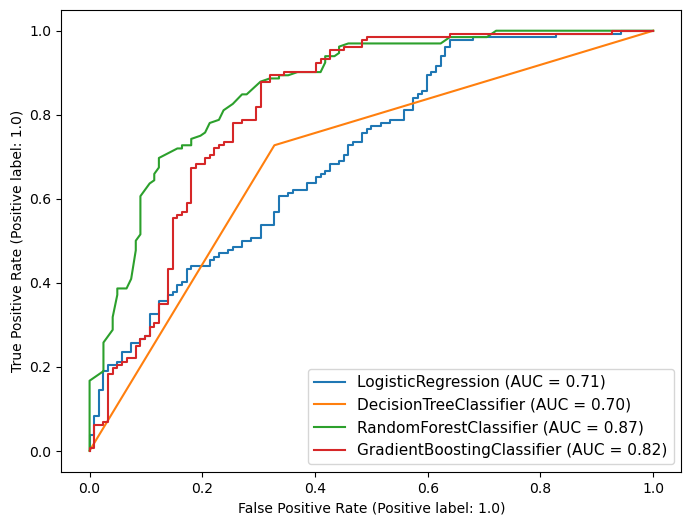

In [99]:
# Fit the Gradient Boosting Classifier model
GBC.fit(x_train, y_train)

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ROC curve for each model
plot_roc_curve(LOGR, x_test, y_test, ax=ax)
plot_roc_curve(DTree, x_test, y_test, ax=ax)
plot_roc_curve(RFC, x_test, y_test, ax=ax)
plot_roc_curve(GBC, x_test, y_test, ax=ax)

# Add legend
plt.legend(prop={'size': 11}, loc='lower right')

# Show plot
plt.show()

Though this method is OBSOLETE.Here we can see the area under curve(AUC) for each model used.

**Alternatively**

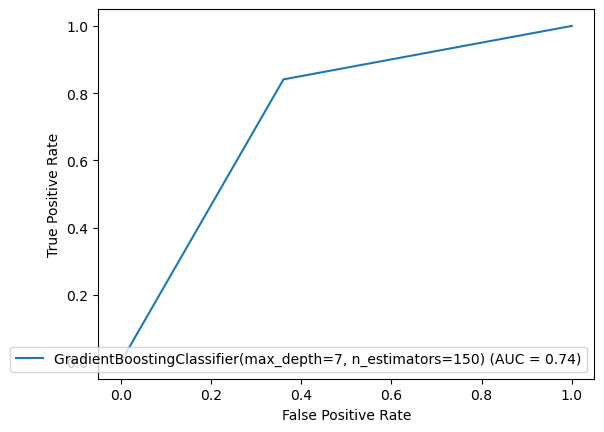

In [100]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()

**Saving the Model**

In [101]:
# Saving the model using .pkl
import joblib
joblib.dump(Final_model, "Loan Application Status.pki")

['Loan Application Status.pki']

In [102]:
# Lets load the saved model and get the predictions
model = joblib.load("Loan Application Status.pki")

# prediction
prediction = model.predict(x_test)
prediction

array([1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0.

These are the predicted Loan Applications Suitable for approval or rejection.

In [103]:
a = np.array(y_test)
df_test = pd.DataFrame()
df_test["predicted"] = prediction
df_test["original"] = a
df_test

,predicted,original
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
249,1.0,1.0
250,0.0,0.0
251,0.0,1.0
252,0.0,0.0


**Predict on the Test Model**

In [104]:
modelname = GradientBoostingClassifier()

In [105]:
# Training the model on the training data
modelname.fit(x_train, y_train)

GradientBoostingClassifier()

In [106]:
# Make predictions on the test data
predictions = modelname.predict(x_test)

In [107]:
conclusion = pd.DataFrame({'Predicted': predictions, 'Original': y_test})

In [108]:
# Creating a dictionary with your data
data = {
    'Predicted': modelname.predict(x_test),
    'Original': y_test
}

In [109]:
# Creating a DataFrame from the data dictionary
conclusion = pd.DataFrame(data)

In [110]:
# Create a DataFrame with 'Predicted' and 'Original' columns
conclusion = pd.DataFrame({'Predicted': modelname.predict(x_test), 'Original': y_test})

In [111]:
print(conclusion)

     Predicted  Original
205        1.0       1.0
629        1.0       0.0
831        0.0       0.0
682        0.0       0.0
454        1.0       1.0
..         ...       ...
528        1.0       1.0
839        0.0       0.0
446        1.0       1.0
659        0.0       0.0
230        1.0       1.0

[254 rows x 2 columns]


**The "Predicted" column**: Displays the model's prediction for the approval or rejection of each loan application. A value of 1.0 generally signifies  approval, whereas 0.0 indicates rejection.

**The "original" column**: Signifies the actual result of each loan application, indicating whether it was approved (1.0) or rejected (0.0.).

### Summary and Conclusion

**Summary**

The Loan Application Status Prediction project seeks to improve the process of loan approval by utilizing machine learning methods to predict the suitability of loan applications for approval or denial. The project involves working with a dataset that includes applicant-related characteristics and goes through different stages, such as data cleansing, preprocessing, and exploratory data analysis. Multiple machine learning algorithms, including Logistic Regression, Decision Tree, Random Forest Classifier and Gradient Boosting Classifier, are used for prediction. Performance measures like accuracy, precision, recall, and F1-score are employed to assess the efficacy of these models. The targeted benchmark accuracy for all models is established at (0.88).However, The Gradient Boosting Classifier with 78% accuracy and ROC-AUC of 74% is chosen as the final model due to its minimal absolute difference between the model's accuracy and cross-validation accuracy.

**Conclusion**

The project effectively showcases the use of machine learning to streamline the loan approval process. Through the use of predictive models, financial institutions can automate initial stages of loan approval, potentially decreasing human bias and enhancing efficiency. **The Gradient Boosting Classifier**, with its balanced performance and accuracy, is identified as the preferred model for predicting loan application statuses. his project sets the foundation for future applications in financial services, enabling more well-informed and unbiased decision-making in loan approvals.

### The End